<a href="https://colab.research.google.com/github/AryanChaturvedi/Text-Classification/blob/main/BERT_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BERT Embeddings as feature vector For ML Models 

In [ ]:
#import Models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Opencv/Document Classification/subjects-questions_10000.csv')

### EDA

In [ ]:
train

,Unnamed: 0,eng,Subject
0,95298,First discovered enzyme was\nA. Isomerase\nB. ...,Biology
1,55186,The diagram shows two magnets and\ntwo iron ro...,Physics
2,111545,Polynuclear hydrocarbons are formed by complet...,Chemistry
3,34588,A turn of radius \( 20 \mathrm{m} \) is banked...,Physics
4,105967,In an equilateral triangle of side \( 3 \sqrt{...,Maths
...,...,...,...
9995,1551,Prove that \( (1+i)^{4}\left(1+\frac{1}{i}\rig...,Maths
9996,77283,Find inclination (in degrees) of a line perpen...,Maths
9997,118940,Burning of coal and diseal releases:\nThis que...,Chemistry
9998,6668,An LCR series circuit with \( 100 \Omega \)\nr...,Physics


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   eng         10000 non-null  object
 2   Subject     10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [ ]:
train.groupby('Subject').count()

,Unnamed: 0,eng
Subject,,
Biology,1065,1065
Chemistry,3114,3114
Maths,2702,2702
Physics,3119,3119


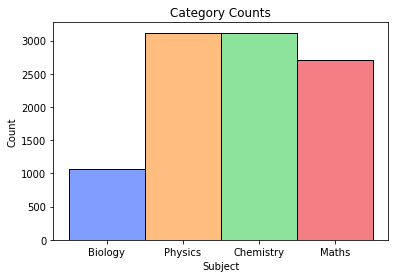

In [ ]:
fig, ax = plt.subplots()
sns.histplot(
    data = train,
    x = 'Subject',
    hue = 'Subject',
    palette = 'bright',
    legend = False,
    ).set(
        title = 'Category Counts');

In [ ]:
# No of words per question
train['word_count'] = train['eng'].apply(lambda row : len(row.split()))
train

,Unnamed: 0,eng,Subject,word_count
0,95298,First discovered enzyme was\nA. Isomerase\nB. ...,Biology,12
1,55186,The diagram shows two magnets and\ntwo iron ro...,Physics,92
2,111545,Polynuclear hydrocarbons are formed by complet...,Chemistry,14
3,34588,A turn of radius \( 20 \mathrm{m} \) is banked...,Physics,52
4,105967,In an equilateral triangle of side \( 3 \sqrt{...,Maths,16
...,...,...,...,...
9995,1551,Prove that \( (1+i)^{4}\left(1+\frac{1}{i}\rig...,Maths,5
9996,77283,Find inclination (in degrees) of a line perpen...,Maths,10
9997,118940,Burning of coal and diseal releases:\nThis que...,Chemistry,33
9998,6668,An LCR series circuit with \( 100 \Omega \)\nr...,Physics,89


In [ ]:
train.describe()

,Unnamed: 0,word_count
count,10000.000000,10000.000000
mean,60915.770100,41.735900
std,35258.028673,26.122036
min,11.000000,1.000000
25%,30133.750000,22.000000
50%,60770.500000,36.000000
75%,91736.250000,57.000000
max,122516.000000,281.000000


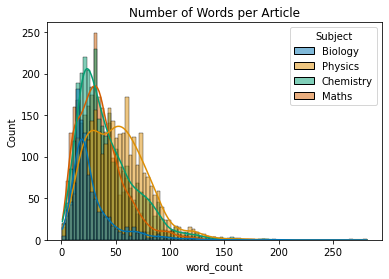

In [ ]:
fig, ax = plt.subplots()
sns.histplot(
    data = train, 
    x = 'word_count',
    palette = 'colorblind',
    hue = 'Subject',
    kde = True
    ).set(
        title = 'Number of Words per Article');

In [ ]:
train['eng'].sample(5)

7248    Q Type your question-\nthan Segment \( 2, \) b...
5211    It is known that \( \sum_{r=1}^{\infty} \frac{...
5072    A system changes from state \( X \) to \( Y \)...
5424    Protein found in eye lens is\nA. Crystallin\nB...
980     Which one of the following methods is used in ...
Name: eng, dtype: object

In [ ]:
# Function for cleaning questions from special charectors
def clean(df):

    df.loc[:,'eng']=pd.DataFrame(df.loc[:,'eng'].str.lower())
    
    # remove (0-9) digits from a string
    df.loc[:,'eng'] = [re.sub(r'\d+','', i) for i in df.loc[:,'eng']]
    
    # [^a-zA-Z] means any character that IS NOT a-z OR A-Z, " " mans replace with space
    df.loc[:,'eng'] = [re.sub(r'[^a-zA-Z]',' ', i) for i in df.loc[:,'eng']]
    
    # remove single charector (alphabates)
    df.loc[:,'eng'] = [re.sub(r"\b[a-zA-Z]\b", '', i) for i in df.loc[:,'eng']]
    #remove special symbols
    df.loc[:,'eng'] = [re.sub(r"[#|\.|_|\^|\$|\&|=|;|,|‐|-|–|(|)|//|\\+|\|*|\']+",'', i) for i in df.loc[:,'eng']]
    
    # remove urls
    df.loc[:,'eng'] = [re.sub(r"https?://\S+|www\.\S+",' ', i) for i in df.loc[:,'eng']]
    
    # remove html tags
    df.loc[:,'eng'] = [re.sub(r"'<.*?>'",' ', i) for i in df.loc[:,'eng']]
    
    
    # remove extra whitespace
    df.loc[:,'eng'] = [re.sub('  +',' ', i) for i in df.loc[:,'eng']]
    
    
    return(df)

In [ ]:
train = clean(train)

In [ ]:
train['eng'].sample(5)

1571     radioactive element has atomic number and mas...
8076     man weighs on the surface of the earth his we...
7764    the differential equation of all parabola with...
5138                                     the compound is 
8319    explain why dogs pant during hot summer days u...
Name: eng, dtype: object

### Creat BERT Pretrained Model

In [ ]:
!pip install transformers

In [ ]:
# Import Packages
import torch
import pandas as pd
from transformers import BertTokenizer, BertModel

# Define BERT Model Name and max sentence length
model_name = 'bert-base-uncased'
max_len = 516

In [ ]:
# Tokeniser for selected model
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)

#Load pre-trained model (weights)
# To returns all hidden-states, output_hidden_states= True )
model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True,) 

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()     

In [ ]:
#Function for generating sentence embeddings
def embedding( text):

  # Add Special Token to input text
  marked_text = "[CLS] " + text + " [SEP]"

  # Tokenize our sentence with the BERT tokenizer.
  tokenized_text = tokenizer.tokenize(marked_text )

  # Map the token strings to their vocabulary indeces.
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  
  #Marking each token to sentence 1
  segments_ids = [1] * len(tokenized_text)

  # Convert inputs to PyTorch tensors
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])

  with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)
    hidden_states = outputs[2]

  token_embeddings = torch.stack(hidden_states, dim=0)
  # Remove dimension 1, the "batches".
  token_embeddings = torch.squeeze(token_embeddings, dim=1)
  token_embeddings = token_embeddings.permute(1,0,2)
  
  #taking token emb from 2nd to last layer
  token_vecs = hidden_states[-2][0]
  
  # token_vecs has size [#token * 768]
  sentence_embedding = torch.mean(token_vecs, dim=0)

  return sentence_embedding

In [ ]:
# Define fxn to calculate embedding of all sentences
collect = []
for i in range (len(train['eng'])):
    print(i )
    temp = embedding( train['eng'][i])
    collect.append(temp)
# Convert list to tensor
collect = torch.stack(collect)
# torch to numpy
trainA = collect.numpy()

In [ ]:
#convert embeddings to datafram
train_emb = pd.DataFrame(trainA)

In [ ]:
# train_emb.to_csv('/content/drive/MyDrive/Collab/Document Classification/Subject-questions1000_emb.csv')

In [ ]:
train_emb  = pd.read_csv('/content/drive/MyDrive/Opencv/Document Classification/Subject-questions1000_emb.csv')

In [ ]:
# Convert subjects into numerical classes
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(train['Subject'])

In [ ]:
tags= label_encoder.classes_

### Applying ML Classification Models

In [ ]:
# Import packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_emb, labels, test_size = 0.2, random_state = 42)

# Create a Random Forest model
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=30,
                                       n_estimators=250, oob_score=True)
# Train the model
classifier_rf.fit(X_train,y_train)

# Predict and get accuracy
y_pred  =classifier_rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.856


In [ ]:
print(metrics.classification_report(y_test, y_pred,target_names=tags))

              precision    recall  f1-score   support

     Biology       0.89      0.81      0.85       196
   Chemistry       0.83      0.83      0.83       601
       Maths       0.87      0.93      0.90       558
     Physics       0.86      0.83      0.84       645

    accuracy                           0.86      2000
   macro avg       0.86      0.85      0.86      2000
weighted avg       0.86      0.86      0.86      2000



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
print(metrics.classification_report(y_test, y_pred,target_names=tags))

              precision    recall  f1-score   support

     Biology       0.81      0.79      0.80       196
   Chemistry       0.85      0.75      0.80       601
       Maths       0.76      0.87      0.81       558
     Physics       0.79      0.79      0.79       645

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM

In [ ]:
from sklearn.svm import SVC
reg_svc = SVC()
reg_svc.fit(X_train, y_train)
y_pred = reg_svc.predict(X_test)
print(metrics.classification_report(y_test, y_pred,target_names=tags))

              precision    recall  f1-score   support

     Biology       0.00      0.00      0.00       196
   Chemistry       0.30      0.56      0.39       601
       Maths       0.00      0.00      0.00       558
     Physics       0.32      0.44      0.37       645

    accuracy                           0.31      2000
   macro avg       0.16      0.25      0.19      2000
weighted avg       0.19      0.31      0.24      2000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
reg_knn = KNeighborsClassifier()
reg_knn.fit(X_train, y_train)
y_pred = reg_knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred,target_names=tags))

              precision    recall  f1-score   support

     Biology       0.34      0.16      0.22       196
   Chemistry       0.38      0.54      0.45       601
       Maths       0.53      0.40      0.46       558
     Physics       0.45      0.46      0.46       645

    accuracy                           0.44      2000
   macro avg       0.43      0.39      0.39      2000
weighted avg       0.44      0.44      0.43      2000



### XGBoost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred,target_names=tags))

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

     Biology       0.87      0.85      0.86       196
   Chemistry       0.84      0.85      0.85       601
       Maths       0.90      0.96      0.93       558
     Physics       0.90      0.85      0.87       645

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



## Fine Tune BERT

Here I am using texts  for fine tuning BERT without their Preprocessing and cleaning

In [ ]:
# Import packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Opencv/Document Classification/subjects-questions_10000.csv')

In [ ]:
train.head()

,Unnamed: 0,eng,Subject
0,95298,First discovered enzyme was\nA. Isomerase\nB. ...,Biology
1,55186,The diagram shows two magnets and\ntwo iron ro...,Physics
2,111545,Polynuclear hydrocarbons are formed by complet...,Chemistry
3,34588,A turn of radius \( 20 \mathrm{m} \) is banked...,Physics
4,105967,In an equilateral triangle of side \( 3 \sqrt{...,Maths


In [ ]:
# Split data into train and test sets
train_data, test_data = train_test_split(train, test_size=0.2, random_state=42)

In [ ]:
# Get the labels
labels = train["Subject"].unique().tolist()

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
# Tokenize the data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(train_data["eng"]), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_data["eng"]), truncation=True, padding=True, max_length=128)

In [ ]:
# Convert labels to integers
train_labels = [labels.index(label) for label in train_data["Subject"]]
test_labels = [labels.index(label) for label in test_data["Subject"]]

In [ ]:
# Convert data to TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))

In [ ]:
# Load pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(labels))

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_dataset.shuffle(100).batch(32), epochs=5, batch_size=32, validation_data=test_dataset.shuffle(100).batch(32))

Epoch 1/5
250/250 [==============================] - 256s 850ms/step - loss: 0.4203 - accuracy: 0.8560 - val_loss: 0.2648 - val_accuracy: 0.9110
Epoch 2/5
250/250 [==============================] - 212s 850ms/step - loss: 0.1751 - accuracy: 0.9402 - val_loss: 0.2491 - val_accuracy: 0.9190
Epoch 3/5
250/250 [==============================] - 208s 834ms/step - loss: 0.0961 - accuracy: 0.9696 - val_loss: 0.2756 - val_accuracy: 0.9165
Epoch 4/5
250/250 [==============================] - 208s 834ms/step - loss: 0.0641 - accuracy: 0.9805 - val_loss: 0.3110 - val_accuracy: 0.9215
Epoch 5/5
250/250 [==============================] - 208s 833ms/step - loss: 0.0524 - accuracy: 0.9822 - val_loss: 0.3551 - val_accuracy: 0.9135


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset.batch(32))

63/63 [==============================] - 17s 269ms/step - loss: 0.3551 - accuracy: 0.9135


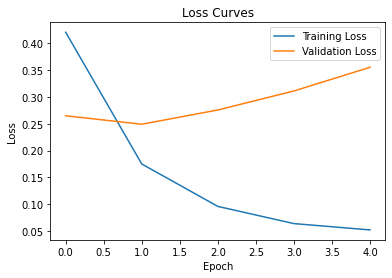

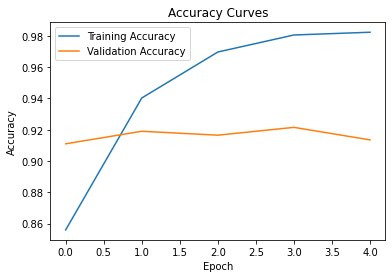

In [ ]:
import matplotlib.pyplot as plt
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
